# Signal processing by SVD

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a clean signal
t = np.linspace(0, 10, 1000)  # Create 1000 time points from 0 to 10
clean_signal = 3 * np.sin(2 * np.pi * 0.5 * t) + 2 * np.sin(2 * np.pi * 1.5 * t)

Add noise to simulate a real-world signal

In [4]:
noise = np.random.normal(0, 1, len(t))  # Generate Gaussian noise
noisy_signal = clean_signal + noise

Create the Hankel matrix:

In [5]:
window_size = 50
stride = 1
n_windows = len(noisy_signal) - window_size + 1
hankel_matrix = np.zeros((window_size, n_windows))

for i in range(n_windows):
    hankel_matrix[:, i] = noisy_signal[i:i + window_size]

In [7]:
# Apply the SVD
U, s, Vt = np.linalg.svd(hankel_matrix, full_matrices=False)

def reconstruct_signal(U, s, Vt, k):
    # Reconstruct using only k singular values
    reconstructed_matrix = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
    
    # Average along anti-diagonals
    reconstructed_signal = np.zeros(len(noisy_signal))
    count = np.zeros(len(noisy_signal))
    
    for i in range(window_size):
        for j in range(n_windows):
            true_index = i + j
            reconstructed_signal[true_index] += reconstructed_matrix[i, j]
            count[true_index] += 1
            
    return reconstructed_signal / count

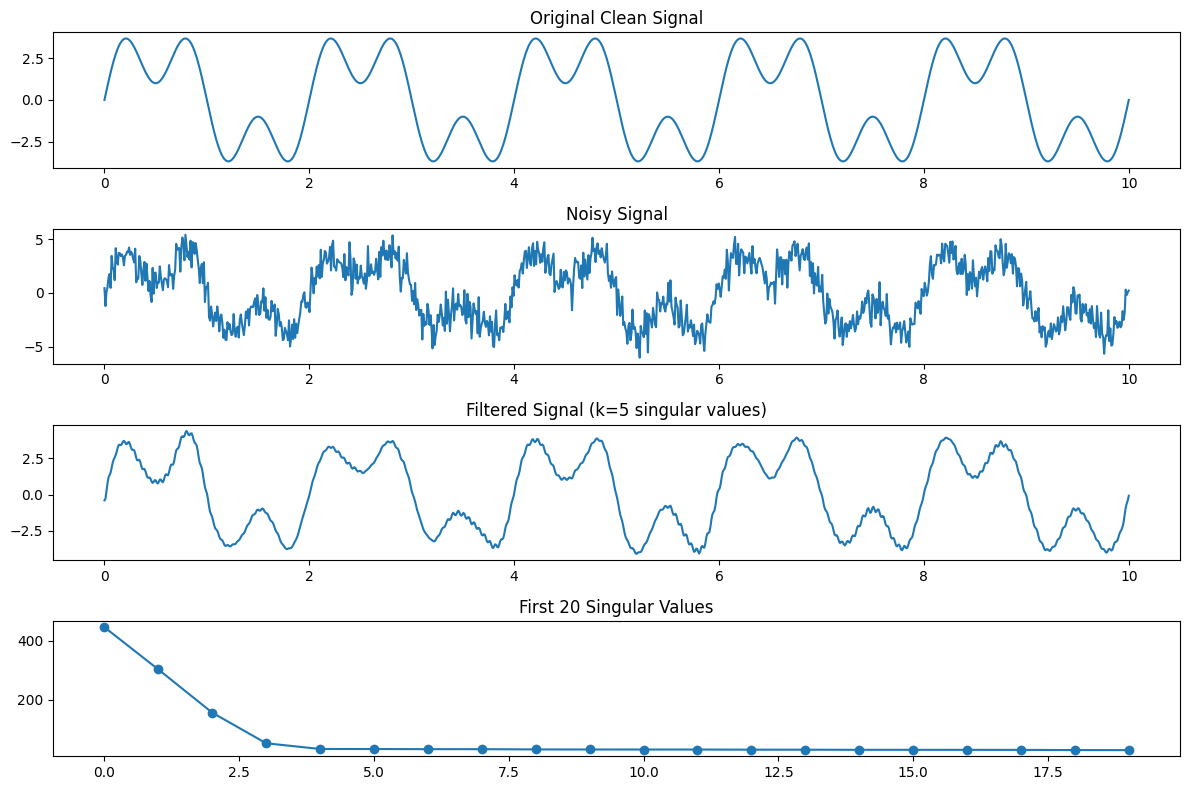

In [8]:
# Filter the signal
k = 5  # Number of singular values to use
filtered_signal = reconstruct_signal(U, s, Vt, k)

plt.figure(figsize=(12, 8))

# Plot original clean signal
plt.subplot(411)
plt.plot(t, clean_signal)
plt.title('Original Clean Signal')

# Plot noisy signal
plt.subplot(412)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')

# Plot filtered signal
plt.subplot(413)
plt.plot(t, filtered_signal)
plt.title(f'Filtered Signal (k={k} singular values)')

# Plot singular values
plt.subplot(414)
plt.plot(s[:20], 'o-')
plt.title('First 20 Singular Values')

plt.tight_layout()
plt.show()